# Imports and Functions

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_systematic_eval(df, x_axis, approach):
    sns.set_theme(style="ticks", palette="Set1")
    if approach == 1:
        fig, axes = plt.subplots(1, 4, figsize=(20, 4), sharex=True)
        sns.boxplot(x=x_axis, y="recovered equations",
                data=df, ax=axes[3])
        axes[3].set_title("Random Embeddings")#
        axes[3].set_ylabel('Recovered Equations (%)')
        axes[3].set_xlabel('Latent Dimensions')
        # get mean of recovered equations per latent dimension
        df_mean = df[[x_axis, 'recovered equations']].groupby(x_axis).mean().sort_values(by=x_axis).reset_index()
    else: 
        df_mean = pd.DataFrame( df[x_axis].unique(), columns=[x_axis])
        fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True)

    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(x=x_axis, y="correlation_dis",
                data=df, ax=axes[0])
    axes[0].set_title("Correlation of Latent and Value Distance")
    axes[0].set_ylabel('Correlation Coefficient')
    axes[0].set_xlabel('Latent Dimensions')
    df_mean['correlation_dis'] = df[[x_axis, 'correlation_dis']].groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['correlation_dis']

    sns.boxplot(x=x_axis, y="accuracy equations",
                data=df, ax=axes[1], 
                #whis=[0, 100]
                )
    axes[1].set_title("Reconstruction of Function Terms")
    axes[1].set_ylabel('Reconstruction Accuracy')
    axes[1].set_xlabel('Latent Dimensions')
    df_mean['accuracy equations'] = df[[x_axis, 'accuracy equations']].groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['accuracy equations']

    sns.boxplot(x=x_axis, y="constant MSE",
                data=df, ax=axes[2])
    axes[2].set_title("Reconstruction of Constants")
    axes[2].set_ylabel('MSE')
    axes[2].set_xlabel('Latent Dimensions')
    df_mean['constant MSE'] = df[[x_axis, 'constant MSE']].groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['constant MSE']
    print("Mean values per latent dimension:")
    print(df_mean.to_string())
    print(f"Best latent dimension for correlation:{df_mean[x_axis][np.argmax(df_mean['correlation_dis'])]} and mean accross all latent dimensions:{np.mean(df['correlation_dis'])}")
    print(f"Best latent dimension for MSE:{df_mean[x_axis][np.argmin(df_mean['constant MSE'])]} and mean accross all latent dimensions:{np.mean(df['constant MSE'])}")
    print(f"Best latent dimension for reconstruction:{df_mean[x_axis][np.argmax(df_mean['accuracy equations'])]} and mean accross all latent dimensions:{np.mean(df['accuracy equations'])}")
    return fig

def plot_systematic_eval_both(df, x_axis):
    sns.set_theme(style="ticks", palette="Set1")
    fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True)
    df_mean_ae = pd.DataFrame( df[x_axis].unique(), columns=[x_axis])
    df_mean_vae = pd.DataFrame( df[x_axis].unique(), columns=[x_axis])
    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(x=x_axis, y="correlation_dis",
                data=df, hue='kind', ax=axes[0])
    axes[0].set_title("Correlation of Latent and Value Distance")
    axes[0].set_ylabel('Correlation Coefficient')
    axes[0].set_xlabel('Latent Dimensions')
    df_mean_ae['correlation_dis'] = df[[x_axis, 'correlation_dis', 'kind']].query('kind == "AE"').groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['correlation_dis']
    df_mean_vae['correlation_dis']= df[[x_axis, 'correlation_dis', 'kind']].query('kind == "VAE"').groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['correlation_dis']


    sns.boxplot(x=x_axis, y="accuracy equations",
                data=df, hue='kind', ax=axes[1])
    axes[1].set_title("Reconstruction of Function Terms")
    axes[1].set_ylabel('Reconstruction Accuracy')
    axes[1].set_xlabel('Latent Dimensions')
    df_mean_ae['accuracy equations'] = df[[x_axis, 'accuracy equations', 'kind']].query('kind == "AE"').groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['accuracy equations']
    df_mean_vae['accuracy equations'] = df[[x_axis, 'accuracy equations', 'kind']].query('kind == "VAE"').groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['accuracy equations']

    sns.boxplot(x=x_axis, y="constant MSE",
                data=df, hue='kind', ax=axes[2])
    axes[2].set_title("Reconstruction of Constants")
    axes[2].set_ylabel('MSE')
    axes[2].set_xlabel('Latent Dimensions')

    
    df_mean_ae['constant MSE'] = df[[x_axis, 'constant MSE', 'kind']].query('kind == "AE"').groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['constant MSE']
    df_mean_vae['constant MSE'] = df[[x_axis, 'constant MSE', 'kind']].query('kind == "VAE"').groupby(x_axis).mean().sort_values(by=x_axis).reset_index()['constant MSE']
    print("Mean values AE per latent dimension:")
    print(df_mean_ae.to_string())
    print("Mean values VAE per latent dimension:")
    print(df_mean_vae.to_string())
    #print(f"Best latent dimension for correlation:{df_mean_ae[x_axis][np.argmax(df_mean['correlation_dis'])]} and mean accross all latent dimensions:{np.mean(df['correlation_dis'])}")
    #print(f"Best latent dimension for MSE:{df_mean_ae[x_axis][np.argmin(df_mean['constant MSE'])]} and mean accross all latent dimensions:{np.mean(df['constant MSE'])}")
    #print(f"Best latent dimension for reconstruction:{df_mean[x_axis][np.argmax(df_mean['accuracy equations'])]} and mean accross all latent dimensions:{np.mean(df['accuracy equations'])}")
    return fig

def plot_losses(df, weight):
    sns.set_theme( palette="Set1")
    df_plot = pd.DataFrame()
    df_plot['weight'] = [str(w) for w in df[weight]]
    df_plot['Reconstruction Loss']= df['test_reconstruction_loss']
    df_plot['Constant Loss']= df['test_constant_loss']
    df_plot['Latent Correlation Loss'] =df['test_latent_correlation_loss']
    df_plot["id"] = df_plot.index
    df_plot = pd.melt(df_plot, id_vars='weight', value_vars=['Reconstruction Loss', 'Constant Loss', 'Latent Correlation Loss'], var_name='Kind of Loss', value_name='loss')

    if weight == 'kl_weight':
        df_kl = pd.DataFrame()
        df_kl['weight'] = [str(w) for w in df[weight]]
        df_kl['kl_loss'] = df['test_kl_divergence']
        df_kl["id"] = df_kl.index
        df_kl = pd.melt(df_kl, id_vars='weight', value_vars=['kl_loss'], var_name='Kind of Loss', value_name='loss')
        fig, ax = plt.subplots(1,2, figsize=(12, 5))
        sns.lineplot(x='weight', y='loss', data=df_kl, ax=ax[1])
        sns.lineplot(x='weight', y='loss', hue='Kind of Loss', data=df_plot, ax=ax[0])
    else:
        fig, ax = plt.subplots(1,1, figsize=(6, 5))
        sns.lineplot(x='weight', y='loss', hue='Kind of Loss', data=df_plot)
    return fig

# First Approach

In [2]:
df_latent_ae = pd.read_csv('results/latent_dims_ae_final.csv')
df_latent_vae = pd.read_csv('results/latent_dims_vae_final.csv')

df_kl = pd.read_csv('results/kl_vae_final.csv')

df_vae = pd.read_csv('results/lr_vae_final.csv')
df_ae = pd.read_csv('results/lr_ae_final.csv')
df_vae['kind'] = 'VAE'
df_ae['kind'] = 'AE'
df_combined = pd.concat([df_ae, df_vae])

Mean values per latent dimension:
   latent dims  recovered equations  correlation_dis  accuracy equations  constant MSE
0            2                 90.7         0.518589            0.385833      0.108502
1            4                 69.4         0.627929            0.852500      0.091324
2            8                 56.4         0.712146            0.827500      0.019324
3           16                 66.8         0.705973            0.885000      0.058798
4           32                 77.2         0.735208            0.880833      0.011718
5           64                 70.0         0.757032            0.883333      0.013095
6          128                 72.1         0.650017            0.803333      0.037458
Best latent dimension for correlation:64 and mean accross all latent dimensions:0.6724133082798549
Best latent dimension for MSE:32 and mean accross all latent dimensions:0.048602526989721076
Best latent dimension for reconstruction:16 and mean accross all latent dimens

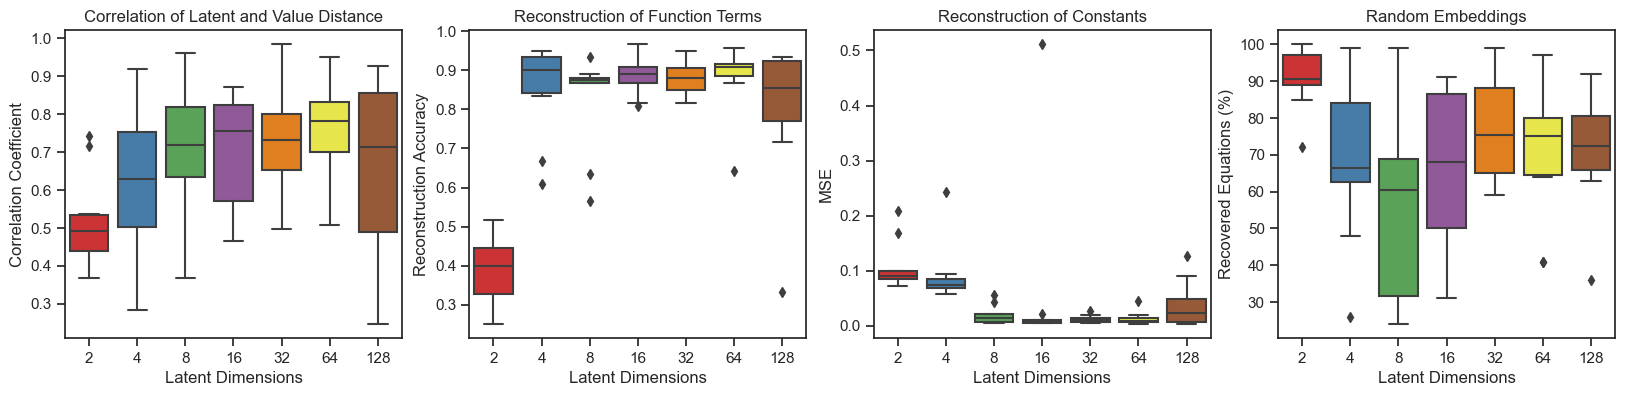

In [49]:
fig = plot_systematic_eval(df_latent_ae, 'latent dims', approach=1)

Mean values per latent dimension:
   latent dims  recovered equations  correlation_dis  accuracy equations  constant MSE
0            2                 86.2         0.664069            0.088333      0.081667
1            4                 75.2         0.655681            0.466667      0.077536
2            8                 63.1         0.718913            0.635000      0.021154
3           16                 68.8         0.643772            0.827500      0.016202
4           32                 59.6         0.654998            0.840833      0.014291
5           64                 57.9         0.694313            0.870000      0.019623
6          128                 55.5         0.674504            0.803333      0.019161
Best latent dimension for correlation:8 and mean accross all latent dimensions:0.6723214064325606
Best latent dimension for MSE:32 and mean accross all latent dimensions:0.03566195250976649
Best latent dimension for reconstruction:64 and mean accross all latent dimensio

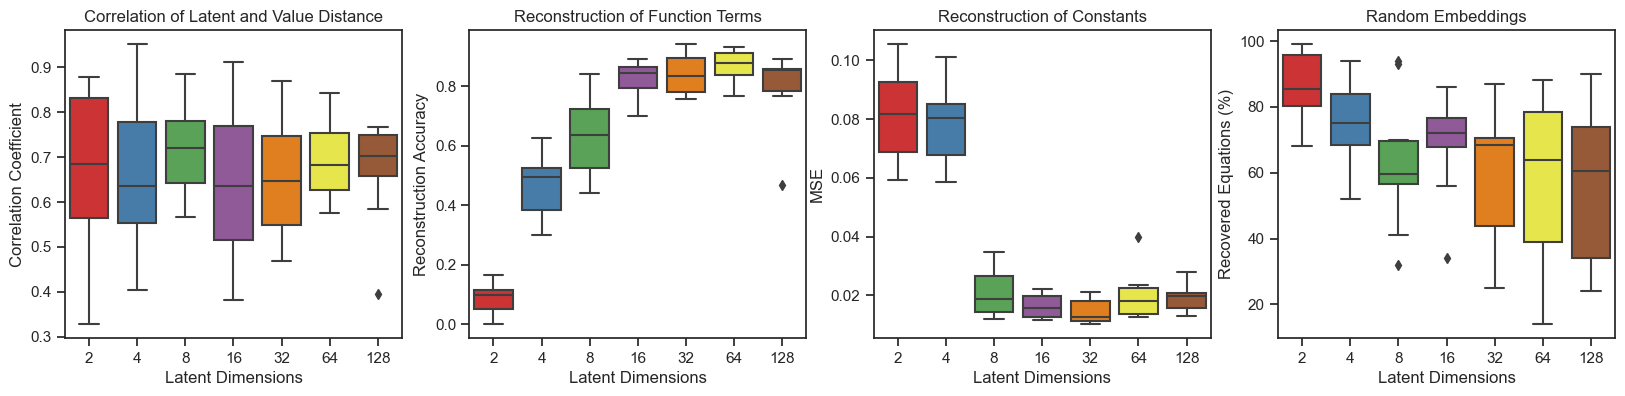

In [50]:
fig = plot_systematic_eval(df_latent_vae, 'latent dims', approach=1)

Mean values per latent dimension:
   kl_weight  recovered equations  correlation_dis  accuracy equations  constant MSE
0     0.0000            56.400000         0.406102            0.315000      0.002931
1     0.0001            43.800000         0.431844            0.263333      0.007572
2     0.0010            67.100000         0.458904            0.079167      0.031801
3     0.0100            84.333333         0.203381            0.000000      0.213585
4     0.1000           100.000000         0.091417            0.000000      0.266230
5     1.0000            77.250000         0.114611            0.000000      0.256838
Best latent dimension for correlation:0.001 and mean accross all latent dimensions:0.3028839195009183
Best latent dimension for MSE:0.0 and mean accross all latent dimensions:0.11599297896372496
Best latent dimension for reconstruction:0.0 and mean accross all latent dimensions:0.12175925925925922


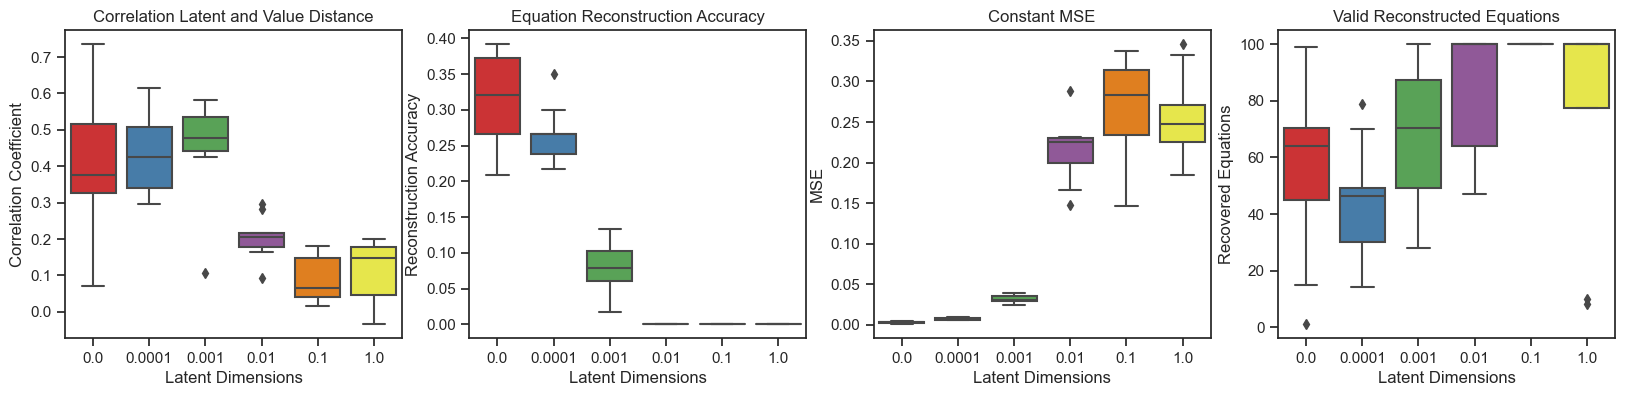

In [20]:
fig = plot_systematic_eval(df_kl, 'kl_weight', 1)

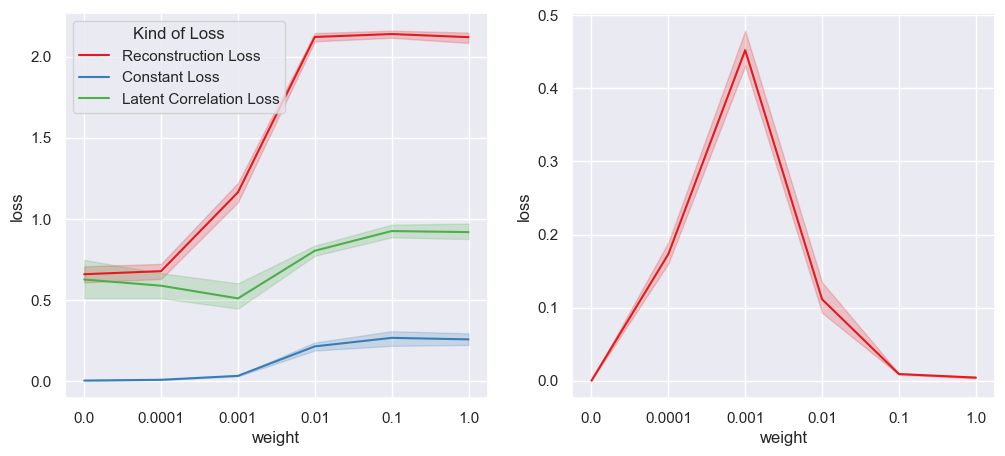

In [3]:
# Kl loss is multiplied with weight here
fig = plot_losses(df_kl, 'kl_weight')

Mean values per latent dimension:
   learning_rate  recovered equations  correlation_dis  accuracy equations  constant MSE
0        0.00001                35.40         0.251103            0.004167  1.641167e-01
1        0.00010                59.50         0.376547            0.214583  1.632997e-02
2        0.00100                41.35         0.516763            0.798750  1.357076e-02
3        0.01000                58.50         0.460715            0.779167  3.193855e-02
4        0.10000                26.90         0.194737            0.324167  2.413663e+24
Best latent dimension for correlation:0.001 and mean accross all latent dimensions:0.37631531973666216
Best latent dimension for MSE:0.001 and mean accross all latent dimensions:2.917614883903664e+23
Best latent dimension for reconstruction:0.001 and mean accross all latent dimensions:0.42416666666666664


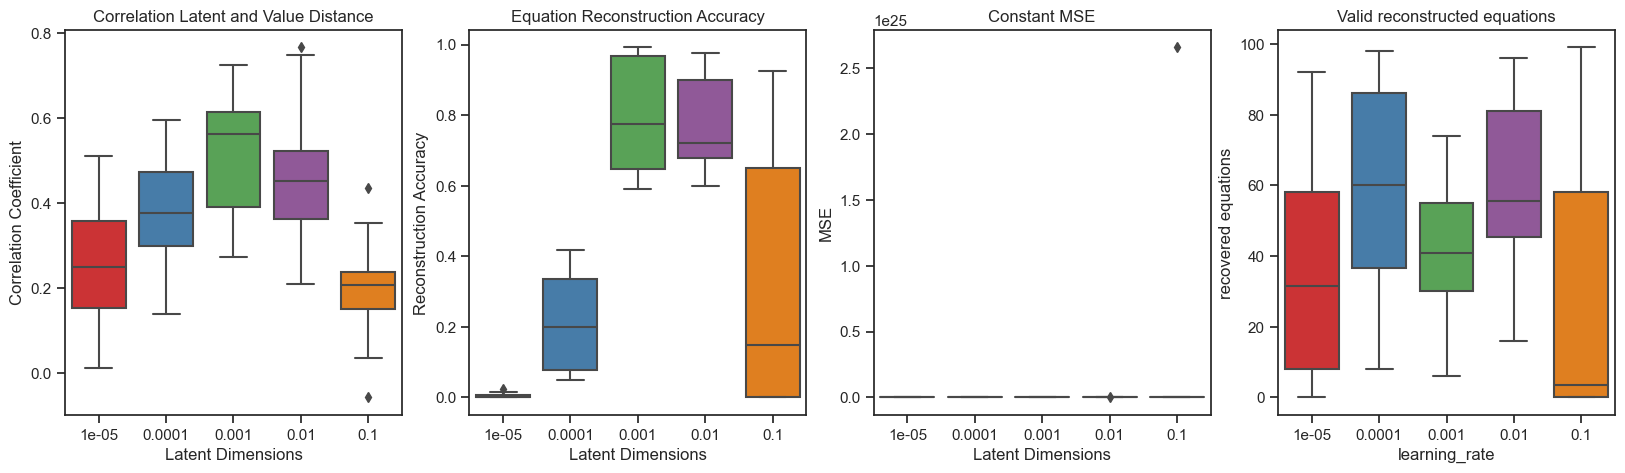

In [7]:
fig = plot_systematic_eval(df_combined, 'learning_rate', 1)

# Second Approach

In [4]:
df_latent_ae = pd.read_csv('results/latent_dims_ae_calssify_final.csv').query('latent_dims < 8 ')
df_latent_vae = pd.read_csv('results/latent_dims_vae_calssify_final.csv').query('latent_dims < 8')
df_latent_vae_big = pd.read_csv('results/latent_dims_vae_calssify_big_final.csv')
df_latent_ae_big = pd.read_csv('results/latent_dims_ae_calssify_big_final.csv')
df_latent_ae = pd.concat([df_latent_ae, df_latent_ae_big])
df_latent_vae = pd.concat([df_latent_vae, df_latent_vae_big])

df_klweight = pd.read_csv('results/classify_klweight_final.csv')

lr_ae = pd.read_csv('results/learning_rate_ae_classify.csv')
lr_vae = pd.read_csv('results/learning_rate_vae_classify.csv')
lr_vae['kind'] = 'VAE'
lr_ae['kind'] = 'AE'
lr_combined = pd.concat([lr_ae, lr_vae])

df_weight_ae = pd.read_csv('results/classify_weight_1.csv')
df_weight_vae = pd.read_csv('results/classify_weight_vae.csv')
df_weight_vae['kind'] = 'VAE'
df_weight_ae['kind'] = 'AE'
df_weight_combined = pd.concat([df_weight_ae, df_weight_vae])

Mean values per latent dimension:
   latent_dims  correlation_dis  accuracy equations  constant MSE
0            1         0.722152            0.177162      0.241606
1            2         0.843781            1.000000      0.004656
2            3         0.979069            1.000000      0.001698
3            4         0.990300            1.000000      0.000853
4            5         0.991725            1.000000      0.001009
5            6         0.992551            1.000000      0.000846
6            7         0.990280            1.000000      0.000896
7           32         0.994879            1.000000      0.000617
8           64         0.996290            1.000000      0.000621
9          128         0.996449            1.000000      0.000473
Best latent dimension for correlation:128 and mean accross all latent dimensions:0.9497476390004158
Best latent dimension for MSE:128 and mean accross all latent dimensions:0.02532739154692432
Best latent dimension for reconstruction:2 and 

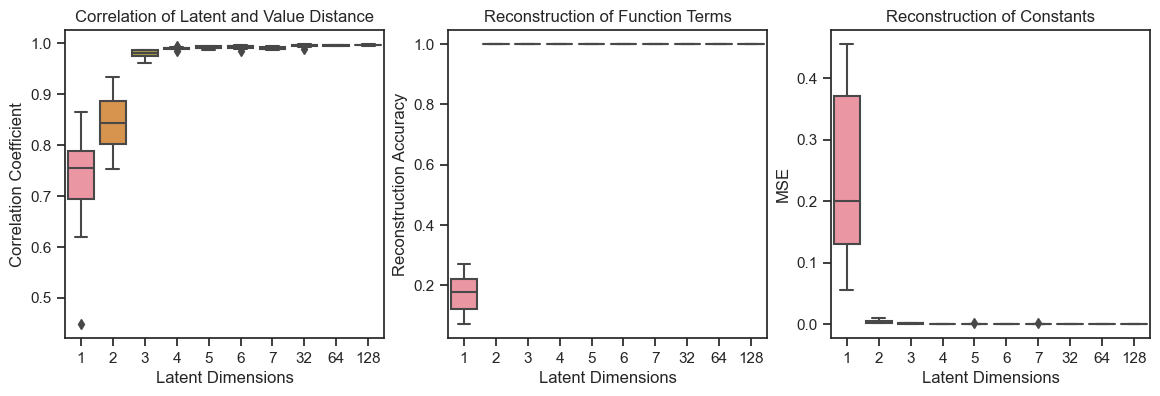

In [56]:
fig = plot_systematic_eval(df_latent_ae, 'latent_dims', 2)

Mean values per latent dimension:
   latent_dims  correlation_dis  accuracy equations  constant MSE
0            1         0.778806            0.207297      0.298069
1            2         0.887756            0.999865      0.007532
2            3         0.954703            1.000000      0.008606
3            4         0.973217            1.000000      0.008308
4            5         0.972331            0.999730      0.007766
5            6         0.966581            1.000000      0.008200
6            7         0.967699            0.999730      0.006955
7           32         0.938270            0.999324      0.008981
8           64         0.912227            0.999459      0.012880
9          128         0.887054            0.999189      0.015035
Best latent dimension for correlation:4 and mean accross all latent dimensions:0.9238643091917038
Best latent dimension for MSE:7 and mean accross all latent dimensions:0.038233186244964544
Best latent dimension for reconstruction:3 and mea

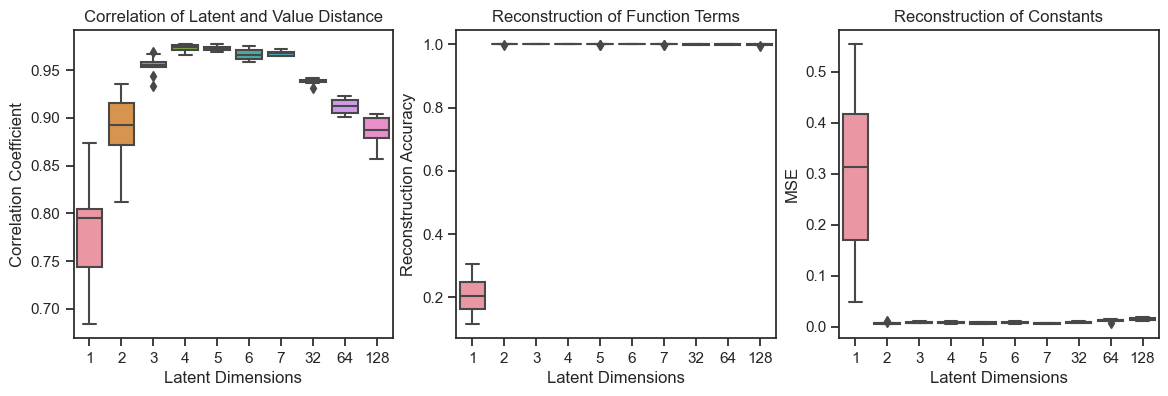

In [57]:
fig = plot_systematic_eval(df_latent_vae, 'latent_dims', 2)

Mean values per latent dimension:
   kl_weight  correlation_dis  accuracy equations  constant MSE
0    0.00000         0.937003            1.000000      0.008944
1    0.00001         0.921867            0.999730      0.010455
2    0.00010         0.923878            0.999865      0.016524
3    0.00100         0.759303            0.906081      0.042156
4    0.01000         0.566524            0.078243      0.268880
5    0.10000         0.134162            0.024189      2.252634
6    1.00000         0.101385            0.023514      8.291584
7   10.00000         0.106313            0.022568      8.303003
Best latent dimension for correlation:0.0 and mean accross all latent dimensions:0.5563043017871678
Best latent dimension for MSE:0.0 and mean accross all latent dimensions:2.399272484884068
Best latent dimension for reconstruction:0.0 and mean accross all latent dimensions:0.5067736486486487


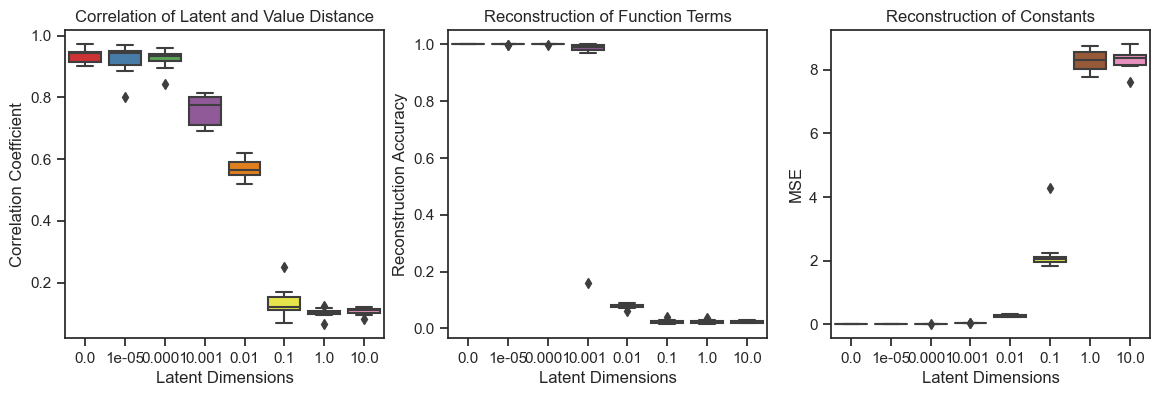

In [58]:
fig = plot_systematic_eval(df_klweight, 'kl_weight', 2)

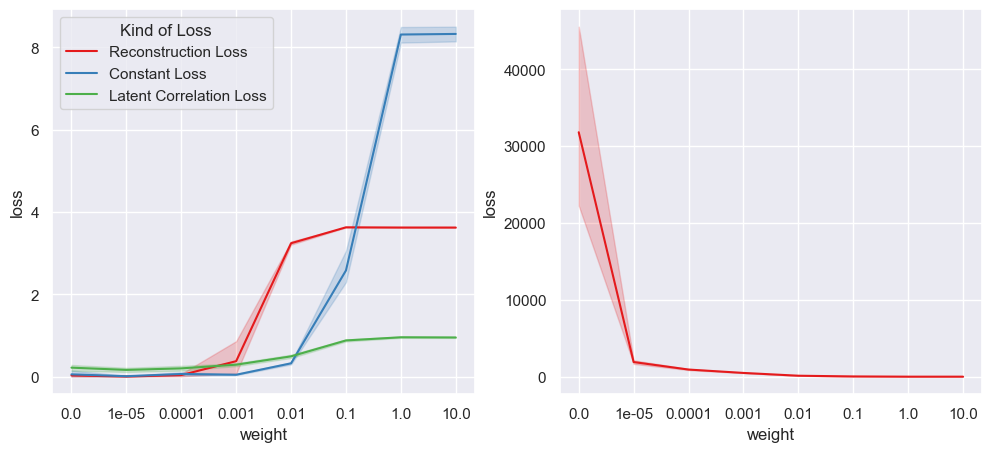

In [5]:
fig = plot_losses(df_klweight, 'kl_weight')

Mean values AE per latent dimension:
   learning_rate  correlation_dis  accuracy equations  constant MSE
0        0.00001         0.606226            0.581486      0.004234
1        0.00010         0.840187            0.998919      0.004380
2        0.00100         0.990394            1.000000      0.000967
3        0.01000         0.924454            1.000000      0.010642
4        0.10000         0.933344            0.027027      8.333390
Mean values VAE per latent dimension:
   learning_rate  correlation_dis  accuracy equations  constant MSE
0        0.00001         0.732632            0.256081      0.015461
1        0.00010         0.861589            0.998784      0.005403
2        0.00100         0.985643            1.000000      0.002183
3        0.01000         0.929220            0.999865      0.010310
4        0.10000         0.196034            0.028919     40.316865


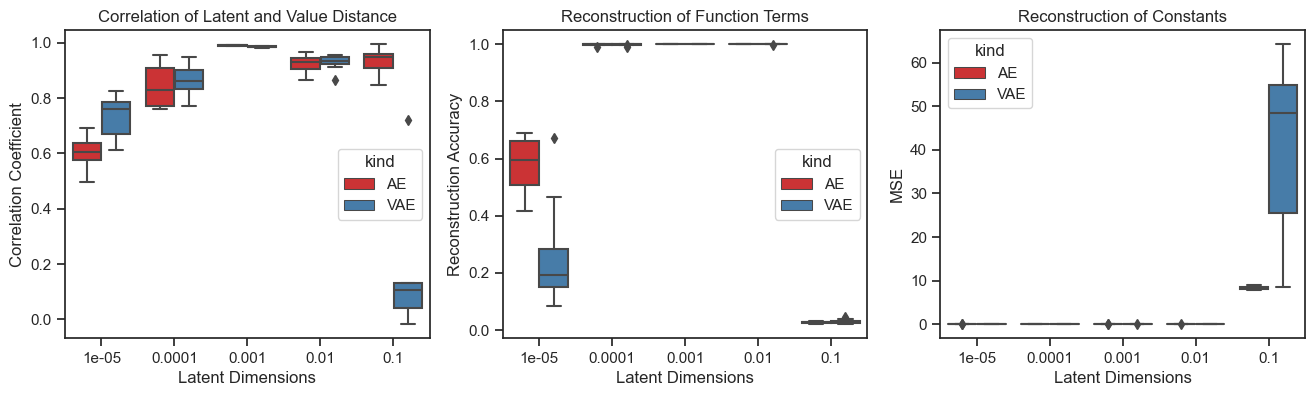

In [62]:
fig = plot_systematic_eval_both(lr_combined, 'learning_rate')

Mean values AE per latent dimension:
   weight  correlation_dis  accuracy equations  constant MSE
0     0.0         0.263949            0.999865      0.003812
1     0.1         0.752636            1.000000      0.003834
2     1.0         0.914449            0.999595      0.005786
3    10.0         0.989845            1.000000      0.010682
4   100.0         0.996841            0.999459      0.038217
5  1000.0         0.998264            0.974730      0.114089
Mean values VAE per latent dimension:
   weight  correlation_dis  accuracy equations  constant MSE
0     0.0         0.109004            1.000000      0.005284
1     0.1         0.775495            1.000000      0.006103
2     1.0         0.971464            0.999865      0.008295
3    10.0         0.995741            1.000000      0.008405
4   100.0         0.999116            1.000000      0.014837
5  1000.0         0.999677            0.998784      0.033287


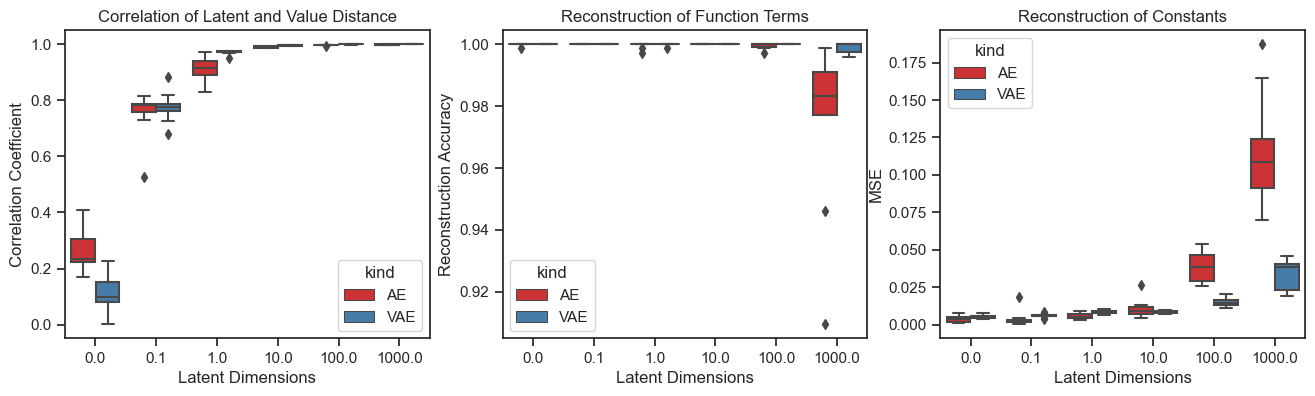

In [61]:
fig = plot_systematic_eval_both(df_weight_combined, 'weight')

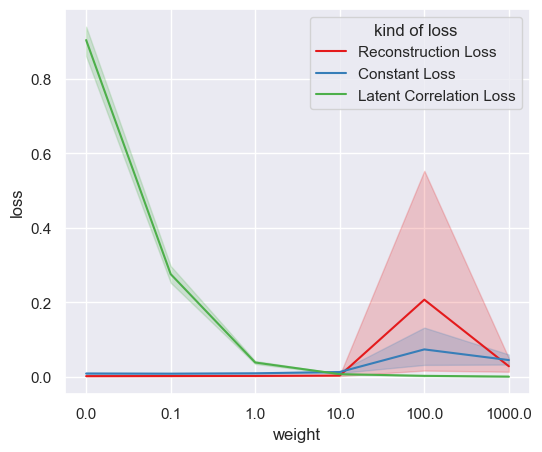

In [19]:
fig = plot_losses(df_weight_vae, 'weight')